In [2]:
import torch

In [3]:
from diabnet.model import LocallyConnected

In [4]:
import matplotlib.pyplot as plt

In [5]:
params={'lw':1, 'alpha':0.1, 'c':'k'} 

In [25]:
SAVE = True
img_formats = ['pdf', 'svg', 'png']    

## Priors

In [7]:
n_feat = 1008
# homo ref
data_0 = torch.stack([torch.ones(n_feat)*2, torch.zeros(n_feat)]).unsqueeze(0)
# hetero
data_1 = torch.ones((1,2,n_feat))
# homo alt
data_2 = torch.stack([torch.zeros(n_feat), torch.ones(n_feat)*2]).unsqueeze(0) 



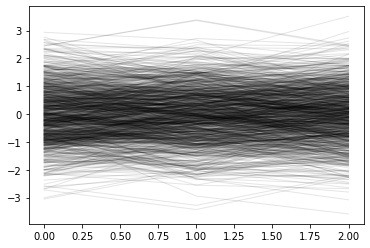

In [8]:
lc1 = LocallyConnected(n_feat, bias=False, activation="identity")
result_lc1 = torch.stack([lc1(data_0), lc1(data_1), lc1(data_2)]).squeeze()
plt.plot(result_lc1.detach().numpy(), **params);

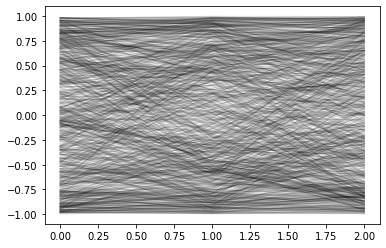

In [9]:
lc2 = LocallyConnected(n_feat, bias=True, activation="tanh")
result_lc2 = torch.stack([lc2(data_0), lc2(data_1), lc2(data_2)]).squeeze()
plt.plot(result_lc2.detach().numpy(), **params);

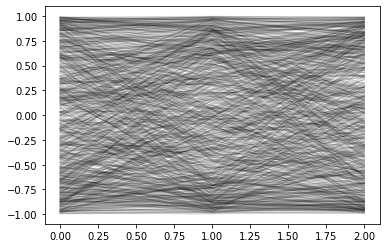

In [10]:
lc3 = LocallyConnected(n_feat, bias=False, activation="tanh")
result_lc3 = torch.stack([lc3(data_0), lc3(data_1), lc3(data_2)]).squeeze()
plt.plot(result_lc3.detach().numpy(), **params);

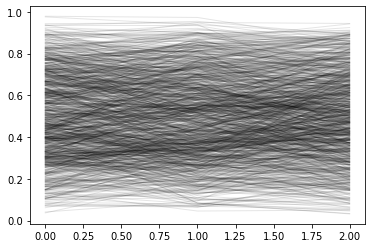

In [11]:
lc4 = LocallyConnected(n_feat, bias=True, activation="sigmoid")
result_lc4 = torch.stack([lc4(data_0), lc4(data_1), lc4(data_2)]).squeeze()
plt.plot(result_lc4.detach().numpy(), **params);

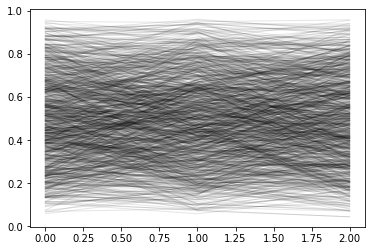

In [12]:
lc5 = LocallyConnected(n_feat, bias=False, activation="sigmoid")
result_lc5 = torch.stack([lc5(data_0), lc5(data_1), lc5(data_2)]).squeeze()
plt.plot(result_lc5.detach().numpy(), **params);

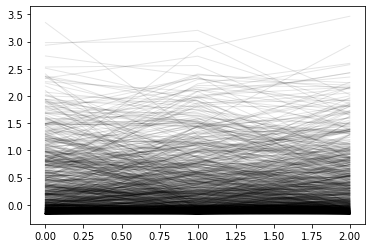

In [13]:
lc6 = LocallyConnected(n_feat, bias=True, activation="gelu")
result_lc6 = torch.stack([lc6(data_0), lc6(data_1), lc6(data_2)]).squeeze()
plt.plot(result_lc6.detach().numpy(), **params);

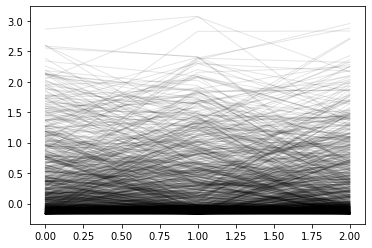

In [14]:
lc7 = LocallyConnected(n_feat, bias=False, activation="gelu")
result_lc7 = torch.stack([lc7(data_0), lc7(data_1), lc7(data_2)]).squeeze()
plt.plot(result_lc7.detach().numpy(), **params);

## Posterior

In [15]:
from diabnet.ensemble import Ensemble

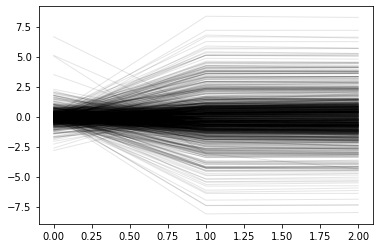

In [16]:
post_lc1 = Ensemble('../results/models/positive/model-positive-8-adamw-lc1-2021-10-05').models[0].lc
result_post_lc1 = torch.stack([post_lc1(data_0), post_lc1(data_1), post_lc1(data_2)]).squeeze()
plt.plot(result_post_lc1.detach().numpy(), **params);

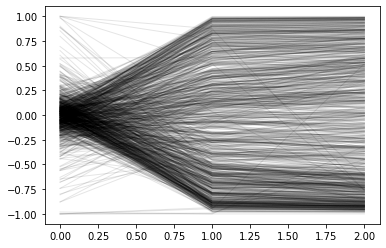

In [17]:
post_lc2 = Ensemble('../results/models/positive/model-positive-15-adamw-lc2-2021-10-05').models[80].lc
result_post_lc2 = torch.stack([post_lc2(data_0), post_lc2(data_1), post_lc2(data_2)]).squeeze()
plt.plot(result_post_lc2.detach().numpy(), **params);

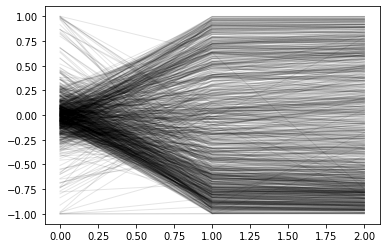

In [18]:
post_lc3 = Ensemble('../results/models/positive/model-positive-11-adamw-lc3-2021-10-05').models[80].lc
result_post_lc3 = torch.stack([post_lc3(data_0), post_lc3(data_1), post_lc3(data_2)]).squeeze()
plt.plot(result_post_lc3.detach().numpy(), **params);

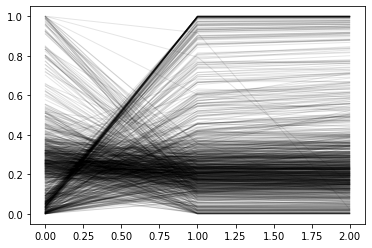

In [19]:
post_lc4 = Ensemble('../results/models/positive/model-positive-17-adamw-lc4-2021-10-05').models[80].lc
result_post_lc4 = torch.stack([post_lc4(data_0), post_lc4(data_1), post_lc4(data_2)]).squeeze()
plt.plot(result_post_lc4.detach().numpy(), **params);

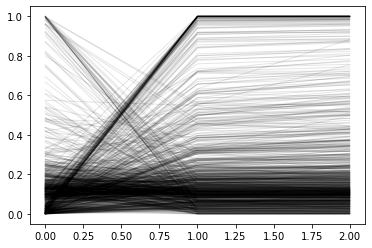

In [20]:
post_lc5 = Ensemble('../results/models/positive/model-positive-7-adamw-lc5-2021-10-05').models[80].lc
result_post_lc5 = torch.stack([post_lc5(data_0), post_lc5(data_1), post_lc5(data_2)]).squeeze()
plt.plot(result_post_lc5.detach().numpy(), **params);

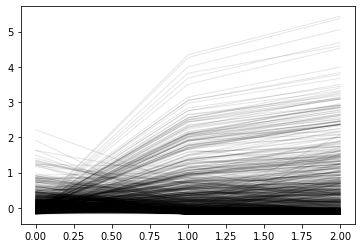

In [21]:
post_lc6 = Ensemble('../results/models/positive/model-positive-12-adamw-lc6-2021-10-05').models[80].lc
result_post_lc6 = torch.stack([post_lc6(data_0), post_lc6(data_1), post_lc6(data_2)]).squeeze()
plt.plot(result_post_lc6.detach().numpy(), **params);

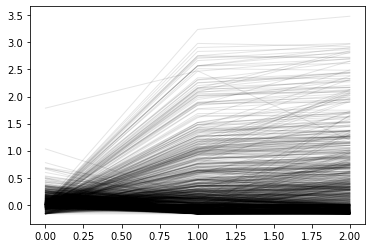

In [22]:
post_lc7 = Ensemble('../results/models/positive/model-positive-21-adamw-lc7-2021-10-05').models[80].lc
result_post_lc7 = torch.stack([post_lc7(data_0), post_lc7(data_1), post_lc7(data_2)]).squeeze()
plt.plot(result_post_lc7.detach().numpy(), **params);

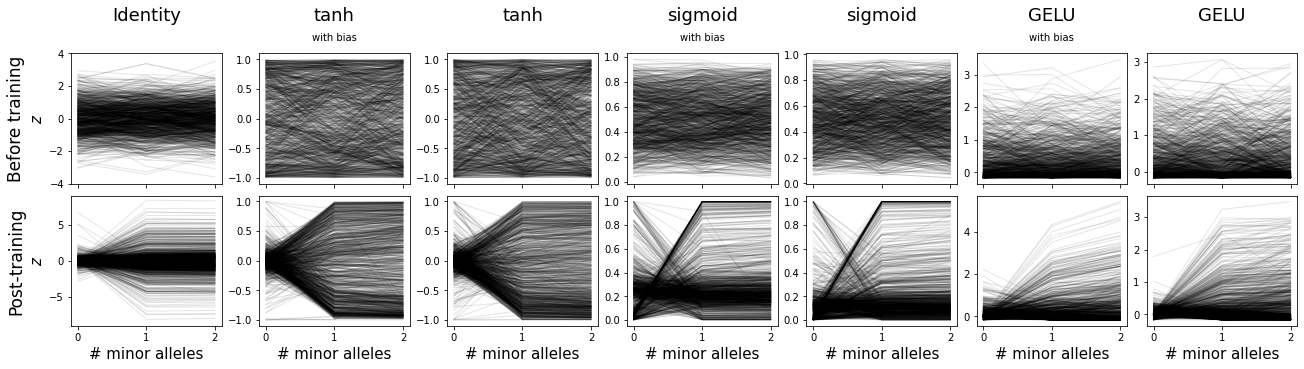

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(18,5), constrained_layout=True, sharex=True)

m0 = result_lc1.detach().abs().max().ceil().item()
m1 = result_post_lc1.detach().abs().max().ceil().item()
axs[0,0].set_xticks([0,1,2]) #sharex
axs[0,0].set_ylabel('$z$', fontsize=15)
axs[0,0].set_ylim([-m0, m0])
axs[1,0].set_ylabel('$z$', fontsize=15)
axs[1,0].set_ylim([-m1, m1])

axs[0,0].plot(result_lc1.detach().numpy(), **params);
axs[1,0].plot(result_post_lc1.detach().numpy(), **params);

axs[0,1].plot(result_lc2.detach().numpy(), **params);
axs[1,1].plot(result_post_lc2.detach().numpy(), **params);

axs[0,2].plot(result_lc3.detach().numpy(), **params);
axs[1,2].plot(result_post_lc3.detach().numpy(), **params);

axs[0,3].plot(result_lc4.detach().numpy(), **params);
axs[1,3].plot(result_post_lc4.detach().numpy(), **params);

axs[0,4].plot(result_lc5.detach().numpy(), **params);
axs[1,4].plot(result_post_lc5.detach().numpy(), **params);

axs[0,5].plot(result_lc6.detach().numpy(), **params);
axs[1,5].plot(result_post_lc6.detach().numpy(), **params);

axs[0,6].plot(result_lc7.detach().numpy(), **params);
axs[1,6].plot(result_post_lc7.detach().numpy(), **params);

# artist
name_act_fun = ['Identity', 'tanh', 'tanh', 'sigmoid', 'sigmoid', 'GELU', 'GELU']
use_bias = [False, True, False, True, False, True, False]

for j in range(7):
    axs[1,j].set_xlabel("# minor alleles", fontsize=15);
    axs[0,j].text(.5,1.25, name_act_fun[j], 
                  horizontalalignment='center',
                  fontsize=18,
                  transform=axs[0,j].transAxes);
    if use_bias[j]:
        axs[0,j].text(.5,1.1, 'with bias', horizontalalignment='center', transform=axs[0,j].transAxes);
    
        
        
axs[0,0].text(-0.9, 0.0, 'Before training', 
              horizontalalignment='center', 
              verticalalignment='center', 
              rotation='vertical', 
              fontsize=17 );
        
axs[1,0].text(-0.9, 0.0, 'Post-training', 
              horizontalalignment='center', 
              verticalalignment='center', 
              rotation='vertical', 
              fontsize=17 );
        

if SAVE:
    for img_format in img_formats:
        fig.savefig(f"images/notebookS06-plot1.{img_format}", bbox_inches="tight")

